<h1> Deep Learning: Age & Gender Prediction Using CNN (Convolutional Neural Network) <h1>

## Load and Read Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import opendatasets

# If running this on local set this to true
is_local = True 

if not is_local:
    opendatasets.download('https://www.kaggle.com/ttungl/adience-benchmark-gender-and-age-classification')

In [3]:
from zipfile import ZipFile
file_name = "archive.zip"

with ZipFile(file_name,'r') as zip :
  zip.extractall()
  print('Berhasil')

Berhasil


In [4]:
#Read data csv
fold0 = pd.read_csv("AdienceBenchmarkGenderAndAgeClassification/fold_0_data.txt",sep = "\t" )
fold1 = pd.read_csv("AdienceBenchmarkGenderAndAgeClassification/fold_1_data.txt",sep = "\t")
fold2 = pd.read_csv("AdienceBenchmarkGenderAndAgeClassification/fold_2_data.txt",sep = "\t")
fold3 = pd.read_csv("AdienceBenchmarkGenderAndAgeClassification/fold_3_data.txt",sep = "\t")
fold4 = pd.read_csv("AdienceBenchmarkGenderAndAgeClassification/fold_4_data.txt",sep = "\t")

In [5]:
#Merge data
total_data = pd.concat([fold0, fold1, fold2, fold3, fold4], ignore_index=True)
print(total_data.shape)
total_data.info()

(19370, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19370 entries, 0 to 19369
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             19370 non-null  object
 1   original_image      19370 non-null  object
 2   face_id             19370 non-null  int64 
 3   age                 19370 non-null  object
 4   gender              18591 non-null  object
 5   x                   19370 non-null  int64 
 6   y                   19370 non-null  int64 
 7   dx                  19370 non-null  int64 
 8   dy                  19370 non-null  int64 
 9   tilt_ang            19370 non-null  int64 
 10  fiducial_yaw_angle  19370 non-null  int64 
 11  fiducial_score      19370 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.8+ MB


In [6]:
total_data.head()

,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
0,30601258@N03,10399646885_67c7d20df9_o.jpg,1,"(25, 32)",f,0,414,1086,1383,-115,30,17
1,30601258@N03,10424815813_e94629b1ec_o.jpg,2,"(25, 32)",m,301,105,640,641,0,0,94
2,30601258@N03,10437979845_5985be4b26_o.jpg,1,"(25, 32)",f,2395,876,771,771,175,-30,74
3,30601258@N03,10437979845_5985be4b26_o.jpg,3,"(25, 32)",m,752,1255,484,485,180,0,47
4,30601258@N03,11816644924_075c3d8d59_o.jpg,2,"(25, 32)",m,175,80,769,768,-75,0,34


In [21]:
#Rename data
total_data['gender'].replace({"f":"female", "m":"male", "u":"unisex"}, inplace=True)

VISUALISASI DATA

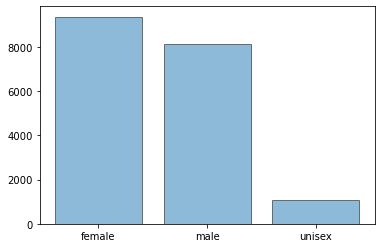

female    9372
male      8120
unisex    1099
Name: gender, dtype: int64

In [29]:
gender = ['female','male','unisex']
plt.bar(gender, total_data.gender.value_counts(), align='center', alpha=0.5, edgecolor = 'black')
plt.show()

total_data.gender.value_counts()

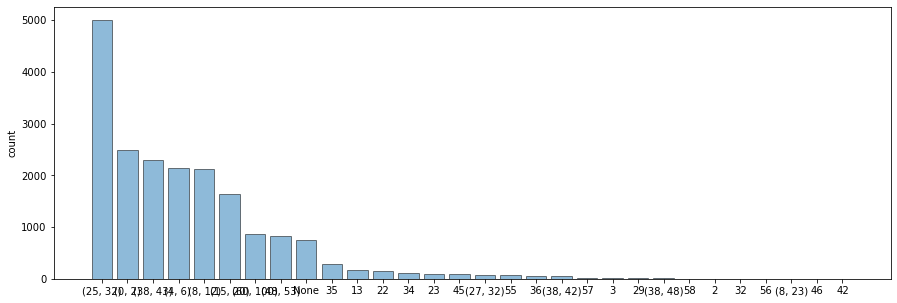

(25, 32)     5004
(0, 2)       2488
(38, 43)     2293
(4, 6)       2140
(8, 12)      2124
(15, 20)     1642
(60, 100)     872
(48, 53)      830
None          748
35            293
13            168
22            149
34            105
23             96
45             88
(27, 32)       77
55             76
36             56
(38, 42)       46
57             24
3              18
29             11
(38, 48)        6
58              5
2               3
32              3
56              2
42              1
46              1
(8, 23)         1
Name: age, dtype: int64

In [30]:
age = ['(25, 32)' , '(0, 2)', '(38, 43)' ,'(4, 6) ','(8, 12)','(15, 20)','(60, 100)','(48, 53)' ,'None','35','13','22','34','23' ,'45','(27, 32)','55','36','(38, 42)','57','3','29','(38, 48)','58','2','32','56','(8, 23)','46','42']

plt.figure(figsize=(15, 5))
plt.bar(age, total_data.age.value_counts(), align='center', alpha=0.5, edgecolor = 'black')
plt.ylabel('count')
plt.show()

total_data.age.value_counts()

In [24]:
print('Banyak nya data:', len(total_data))

print('Nilai data dari data gender:')
print(total_data.gender.unique())
print('---------------------------------------------------')
print('banyaknya nilai "nan" dalam gender:')
print(total_data.gender.isna().sum())
print('===================================================')

print('Nilai data dari data age:')
print(total_data.age.unique())
print('---------------------------------------------------')
print('banyak nya nilai "none" dalam age:')
print((total_data.age == 'None').sum())
print('===================================================')

Banyak nya data: 19370
Nilai data dari data gender:
['female' 'male' nan 'unisex']
---------------------------------------------------
banyaknya nilai "nan" dalam gender:
779
Nilai data dari data age:
['(25, 32)' '(38, 43)' '(4, 6)' '(60, 100)' '(15, 20)' '(48, 53)'
 '(8, 12)' '(0, 2)' 'None' '(38, 48)' '35' '3' '55' '58' '22' '13' '45'
 '36' '23' '(38, 42)' '(8, 23)' '(27, 32)' '57' '56' '2' '29' '34' '42'
 '46' '32']
---------------------------------------------------
banyak nya nilai "none" dalam age:
748


Image shape: (485, 484, 3)
Age: (25, 32) Gender: male


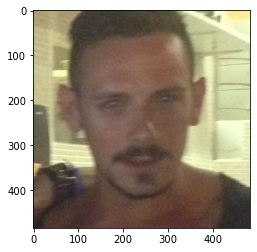

In [27]:
import cv2
path = "AdienceBenchmarkGenderAndAgeClassification/faces/"+total_data.user_id.loc[3]+"/coarse_tilt_aligned_face."+str(total_data.face_id.loc[3])+"."+total_data.original_image.loc[3]
image = cv2.imread(path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
print('Image shape:', image.shape)
print('Age:', total_data.loc[3].age, 'Gender:', total_data.loc[3].gender)
print('===================================================')

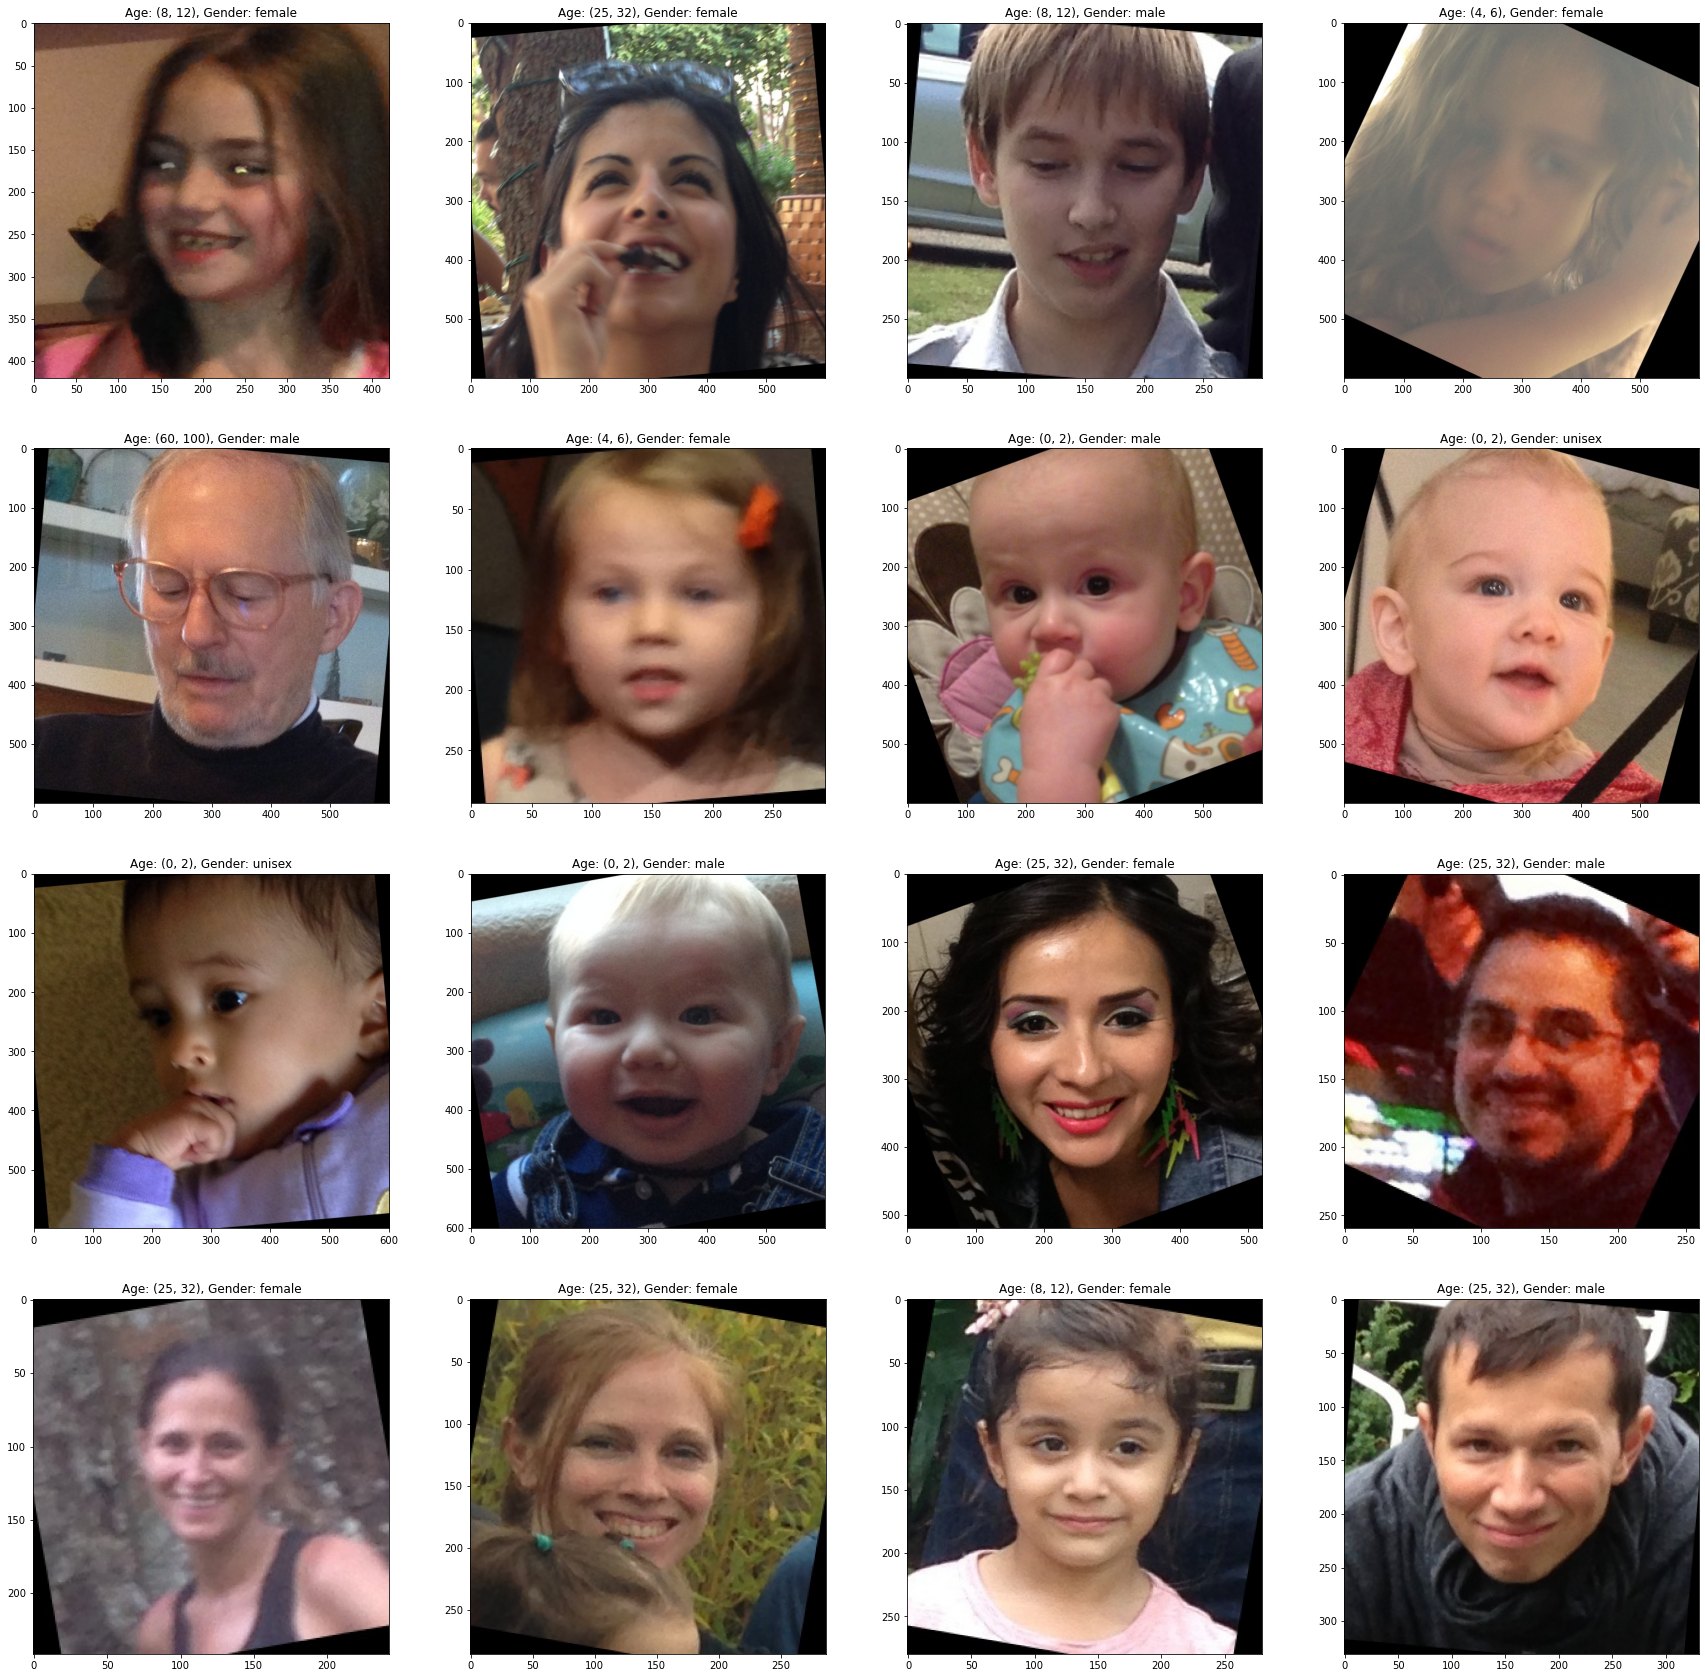

In [28]:
import random
images = []

for _ in range(16):
    sample_num = random.randint(0, len(total_data))
    im_name = total_data.iloc[sample_num].original_image
    im_path = "AdienceBenchmarkGenderAndAgeClassification/faces/"+str(total_data.user_id.loc[sample_num])+"/coarse_tilt_aligned_face."+str(total_data.face_id.loc[sample_num])+"."+ im_name
    
    image = cv2.imread(im_path)
    age = total_data.iloc[sample_num].age
    gender = total_data.iloc[sample_num].gender
    n_col = 4
    n_rows = 4
    images.append((image, age, gender))
    
fig, axs = plt.subplots(ncols=n_col, nrows=n_rows, figsize=(30,30))
count = 0
for i in range(n_rows):
      for j in range(n_col):
        axs[i][j].imshow(cv2.cvtColor(images[count][0], cv2.COLOR_BGR2RGB))
        axs[i][j].set_title(f'Age: {images[count][1]}, Gender: {images[count][2]}')
        count+=1
plt.show()

## Data Preprocessing

In [12]:
imp_data = total_data[['age', 'gender', 'x', 'y', 'dx', 'dy']].copy() # copy data
imp_data.info()
img_path = [] #link path
for row in total_data.iterrows(): # link path merujuk gambar
    path = "AdienceBenchmarkGenderAndAgeClassification/faces/"+row[1].user_id+"/coarse_tilt_aligned_face."+str(row[1].face_id)+"."+row[1].original_image
    img_path.append(path) #ditambahkan ke variabel img_path
imp_data['img_path'] = img_path #menamhkan kolom baru yaitu img_path, dengan isi link path gambarnya
imp_data.head() # menampilkan 5 data teratas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19370 entries, 0 to 19369
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     19370 non-null  object
 1   gender  18591 non-null  object
 2   x       19370 non-null  int64 
 3   y       19370 non-null  int64 
 4   dx      19370 non-null  int64 
 5   dy      19370 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 908.1+ KB


,age,gender,x,y,dx,dy,img_path
0,"(25, 32)",f,0,414,1086,1383,AdienceBenchmarkGenderAndAgeClassification/fac...
1,"(25, 32)",m,301,105,640,641,AdienceBenchmarkGenderAndAgeClassification/fac...
2,"(25, 32)",f,2395,876,771,771,AdienceBenchmarkGenderAndAgeClassification/fac...
3,"(25, 32)",m,752,1255,484,485,AdienceBenchmarkGenderAndAgeClassification/fac...
4,"(25, 32)",m,175,80,769,768,AdienceBenchmarkGenderAndAgeClassification/fac...


In [13]:
# age mapping
age_mapping = [('(0, 2)', '0-2'), ('2', '0-2'), ('3', '0-2'), ('(4, 6)', '4-6'), ('(8, 12)', '8-13'), ('13', '8-13'), ('22', '15-20'), ('(8, 23)','15-20'), ('23', '25-32'), ('(15, 20)', '15-20'), ('(25, 32)', '25-32'), ('(27, 32)', '25-32'), ('32', '25-32'), ('34', '25-32'), ('29', '25-32'), ('(38, 42)', '38-43'), ('35', '38-43'), ('36', '38-43'), ('42', '48-53'), ('45', '38-43'), ('(38, 43)', '38-43'), ('(38, 42)', '38-43'), ('(38, 48)', '48-53'), ('46', '48-53'), ('(48, 53)', '48-53'), ('55', '48-53'), ('56', '48-53'), ('(60, 100)', '60+'), ('57', '60+'), ('58', '60+')]
age_mapping_dict = {each[0]: each[1] for each in age_mapping} 
drop_labels = []

for idx, each in enumerate(imp_data.age):
    if each == 'None':
        drop_labels.append(idx)
    else:
        imp_data.age.loc[idx] = age_mapping_dict[each]
imp_data = imp_data.drop(labels=drop_labels, axis=0) #droped None values
imp_data.age.value_counts(dropna=False)

/home/alfin/Documents/vscode-koding/pembelajaran-mesin-env/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


25-32    5296
38-43    2776
0-2      2509
8-13     2292
4-6      2140
15-20    1792
48-53     916
60+       901
Name: age, dtype: int64

In [14]:
imp_data = imp_data.dropna()
clean_data = imp_data[imp_data.gender != 'u'].copy()
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17452 entries, 0 to 19345
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       17452 non-null  object
 1   gender    17452 non-null  object
 2   x         17452 non-null  int64 
 3   y         17452 non-null  int64 
 4   dx        17452 non-null  int64 
 5   dy        17452 non-null  int64 
 6   img_path  17452 non-null  object
dtypes: int64(4), object(3)
memory usage: 1.1+ MB


In [17]:
gender_to_label_map = {
    'f' : 0,
    'm' : 1
}
clean_data['gender'] = clean_data['gender'].apply(lambda g: gender_to_label_map[g])
clean_data.head()

,age,gender,x,y,dx,dy,img_path
0,25-32,0,0,414,1086,1383,AdienceBenchmarkGenderAndAgeClassification/fac...
1,25-32,1,301,105,640,641,AdienceBenchmarkGenderAndAgeClassification/fac...
2,25-32,0,2395,876,771,771,AdienceBenchmarkGenderAndAgeClassification/fac...
3,25-32,1,752,1255,484,485,AdienceBenchmarkGenderAndAgeClassification/fac...
4,25-32,1,175,80,769,768,AdienceBenchmarkGenderAndAgeClassification/fac...


In [18]:
age_to_label_map = {
    '0-2'  :0,
    '4-6'  :1,
    '8-13' :2,
    '15-20':3,
    '25-32':4,
    '38-43':5,
    '48-53':6,
    '60+'  :7
}
clean_data['age'] = clean_data['age'].apply(lambda age: age_to_label_map[age])
clean_data.head()

,age,gender,x,y,dx,dy,img_path
0,4,0,0,414,1086,1383,AdienceBenchmarkGenderAndAgeClassification/fac...
1,4,1,301,105,640,641,AdienceBenchmarkGenderAndAgeClassification/fac...
2,4,0,2395,876,771,771,AdienceBenchmarkGenderAndAgeClassification/fac...
3,4,1,752,1255,484,485,AdienceBenchmarkGenderAndAgeClassification/fac...
4,4,1,175,80,769,768,AdienceBenchmarkGenderAndAgeClassification/fac...


In [20]:
from PIL import Image


X = clean_data[['img_path']]
y = clean_data[['gender']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('Train data shape {}'.format(X_train.shape))
print('Test data shape {}'.format(X_test.shape))

train_images = []
test_images = []

for row in X_train.iterrows():
    image = Image.open(row[1].img_path)
    image = image.resize((227, 227))   # Resize the image
    data = np.asarray(image)
    train_images.append(data)

for row in X_test.iterrows():
    image = Image.open(row[1].img_path)
    image = image.resize((227, 227))  # Resize the image
    data = np.asarray(image)
    test_images.append(data)

train_images = np.asarray(train_images)
test_images = np.asarray(test_images)
print('Train images shape {}'.format(train_images.shape))
print('Test images shape {}'.format(test_images.shape))

Train data shape (12216, 1)
Test data shape (5236, 1)
Train images shape (12216, 227, 227, 3)
Test images shape (5236, 227, 227, 3)


GENDER MODEL

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, Dropout, LayerNormalization

In [ ]:
#Model Pertama

# model = sequential()
# model.add(Convolution2D(96, (7,7), padding='valid', kernel_size=(7, 7), strides=4, input_shape=(227,227,3)))
# model.add(Activation='relu')

#BELUM SELESAII 
